Written by Guanyu Lin - guanyul@kth.se, and Tawsiful Islam - tawsiful@kth.se

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import problem1 as mz
import problem1_bonus as mz_b

maze_mat = np.array([
                [0, 0, 1, 0, 0, 0, 0, 0],
                [0, 0, 1, 0, 0, 1, 0, 0],
                [0, 0, 1, 0, 0, 1, 1, 1],
                [0, 0, 1, 0, 0, 1, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0],
                [0, 1, 1, 1, 1, 1, 1, 0],
                [0, 0, 0, 0, 1, 2, 0, 0]])
start_pos = (0,0)
minotaur_pos = (6,5)
mz.draw_maze(maze_mat, start_pos, minotaur_pos)

## Task (a) MDP formulation

We propose the following tuple MDP formulation: 

#### State space $\mathcal{S}$
We would need to model the state space with each state as a tuple. Note that we exclude the obstacles' position for player since these are impossible states to be in for the player. Formally, the state space is

$$\mathcal{S} = \big\lbrace (i_p,j_p),(i_m,j_m):\textrm{such that the cell
} (i_p,j_p) \textrm{ is not in the wall}\big\rbrace.$$
With $(i_p,j_p)$ represents the position of the player and the $(i_m,j_m)$ represents the position of the minotaur.

#### Action space $\mathcal{A}$
We allow the player to chose to either move `left`, `right`, `down`, `up` or not move at all (`stay`) and the minotaur moves randomlly to `left`, `right`, `down`, `up` without possible to control.
Formally, the action space is

$$\mathcal{A} = \lbrace \textrm{up}, \textrm{ down}, \textrm{ left}, \textrm{ right}, \textrm{ stay} \rbrace.$$ 
- There is no explicit action space for the Minotaur since its movements are not under our control.

#### Transition probabilities $\mathcal{P}$
Note that there is no randomness involved upon taking an action by the player. Since the minotaur can not stay and will always move. the Transition probabilities are,  

- If at state $s(0)$ taking action  $a$ does not lead the player to a wall or an obstacle but to another state (or position) $s'$, then $\mathbb{P}(s(0)',s(1)') \vert (s(0),s(1)), a) = 1$. 
- If at state $s(0)$ taking action  $a$ leads the player to a wall or an obstacle, the player remains in his state (or position) $s$, then $\mathbb{P}(s(0),s(1)') \vert (s(0),s(1)), a) = 1$.
- Remember: $S=((i_p,j_p),(i_m,j_m))$ So $s(0)=(i_p,j_p)$ represents player's posiiton and $s(1)$ represents minotaur's position.



#### Rewards $\mathcal{R}$
The objective of the player is to find the exit of the maze while avoiding the obstacles.    
   - If at state $s$, taking action $a$, leads the player to a wall or $(i_p,j_p)=(i_m,j_m)$  then $r(s,a) = -\infty$
   - If at state $s$, taking action $a$, leads the player to some other position in the maze that is not the exit nor a wall, then $r(s, a) = -1$. 
   - If at state $s$, taking action $a$, leads the player to the exit then $r(s ,a) = 0$.  

## Task (b) Alternating round

#### State space $\mathcal{S}$
Same as in task (a).

#### Action space $\mathcal{A}$
Same as in task (a).

#### Transition probabilities $\mathcal{P}$
Assume that for $T=0,2,4,...,x$ is player's round, and $T=1,3,5,...,2x+1$ is minotaur's round.
- player's round: If at state $s(0)$ taking action  $a$ does not lead the player to a wall or an obstacle but to another state (or position) $s'$, then $\mathbb{P}(s(0)',s(1)) \vert (s(0),s(1)), a) = 1$. 
- player's round: If at state $s(0)$ taking action  $a$ leads the player to a wall or an obstacle, the player remains in his state (or position) $s$, then $\mathbb{P}(s(0),s(1)) \vert (s(0),s(1)), a) = 1$.
- minotaur's round: $\mathbb{P}(s(0),s(1)') \vert (s(0),s(1)), a) = 1$.

#### Rewards $\mathcal{R}$
Same as in task (a).

#### Analyse
Since the player observes the Minotaur's position before making a move, the player can make informed decisions based on the Minotaur's current location. 
So I believe that the Minotaur will less likely to catch the player if they are not moving simultaneously.


## Task (c) Dynamic Programming

We showed the policy by doing a animation of one episode.

In [ ]:
# Create an environment maze
env = mz.Maze(maze_mat,None,False,False)
# Finite horizon
horizon = 20
# Solve the MDP problem with dynamic programming 
V, policy= mz.dynamic_programming(env,horizon)
method = 'DynProg'
start  = ((0, 0),( 6, 5))
path = env.simulate(start, policy, method)
mz.animate_solution(maze_mat, path)
#print(path)

## Task (d)
We simulated siturations that allowing the minotaur to stay and without allowing it to stay by 10000 times with each T from 1 - 30, and check if the player's final location is at the exit. If it is, we mark this simulation as a success. If by any frame, the minotaur and the player are in the same grid, we stop this episode directly without counting it as a success.

When T is greater than 15 from both situration, we begin seeing success trials. Because it would take at least that many steps for the player to get to the exit.

By comparing with and without the minotaur to take the stay action, we can observe that allowing the monster to stay has a significant lower success rate.

The reason behind this can be that because the minotaur is swapning at the exit, and by allowing it to take the stay action, 
the probability that the minotaur stay around the exit will be much higher.

In [ ]:
# Not allow monster to stay
n = 10000
ps = []
for t in range(31):
    V, policy= mz.dynamic_programming(env,t)
    success = 0
    method = 'DynProg'
    start  = ((0, 0),(6, 5))
    for _ in range(n):
        path = env.simulate(start, policy, method);
        if path[-1][0] == (6, 5):
            success += 1
    ps.append(success/n)

plt.plot(ps, label="Without Allowing Monster to Stay")

# Allow monster to stay
enva = mz.Maze(maze_mat)
psa = []
for t in range(31):
    V, policy= mz.dynamic_programming(enva,t)
    success = 0
    method = 'DynProg'
    start  = ((0, 0),(6, 5))
    for _ in range(n):
        path = enva.simulate(start, policy, method);
        if path[-1][0] == (6, 5):
            success += 1
    psa.append(success/n)
plt.plot(psa, label="Allowing Monster to Stay")
plt.legend()
plt.title("Success Rate Over Different Time Horizons")
plt.xlabel("Time Horizon T")
plt.ylabel("Success Rate")
plt.show()

## Task (e) and (f) Value Iteration

According to the task discribtion, the problem should now be formulated as an infinit horizon MDP. The Transition probabilities, Rewards are the same as previours.

It is known that the player's life is geometrically distributed with mean 30. So we have: $\mathbb{E}[T]=\frac1{1-\lambda}=30$ 

with objective function $\max_{\pi}\lim_{T\to\infty}\mathbb{E}[\sum_{t=1}^Tr_t(S_t^\pi,a_t^\pi)]$


When implementing the code, we add a condition in every iteration that $random.random() < 29/30$ to essentially checks if the generated random value falls below the threshold, simulating the geometric distribution of life with mean 30.\

The probability of getting out alive using this policy by simulating 10 000 games is 62%.

In [ ]:
env_VI = mz.Maze(maze_mat,None,False,False)
n = 10000
success = 0
v, policy = mz.value_iteration(env_VI, 29/30, 0.001)
start  = ((0, 0),(6, 5))
#path = env.simulate(start, policy, method)
#mz.animate_solution(maze_mat, path)
for _ in range(n):
    path = env_VI.simulate(start, policy, 'ValIter')
    if path[-1][0] == (6, 5):
        success += 1
print("The survice rate is: "+str(100*success/n)+"%")

## Task (g)

#### What does it mean that a learning method is on-policy or off-policy?

- On-policy learning methods update the policy that is currently being used to make decisions. As the agent interacts with the environment, it updates its policy based on the outcomes of its actions. This means that the learning and decision-making processes are intertwined, and the policy that the agent uses to explore the environment is the same one that it is trying to improve.

- Off-policy learning methods, on the other hand, learn about an optimal policy independently of the agent’s actions. They use data collected from a different policy to update their knowledge about the optimal policy. This means that the policy used for learning (the target policy) can be different from the policy used for decision-making (the behavior policy). An example of an off-policy learner is Q-learning.

#### State the convergence conditions for Q-learning and SARSA.

For Q-leaning
- The learning rates must approach zero, but not too quickly. Formally, this requires that the sum of the learning rates must diverge, but the sum of their squares must converge.

- Each state-action pair must be visited infinitely often. This has a precise mathematical definition: each action must have a non-zero probability of being selected by the policy in every state, i.e. π(s, a) > 0 for all (s, a). In practice, using an ε-greedy policy (where ε > 0) ensures that this condition is satisfied.

For SARSA
- The learning rate parameter α must satisfy the conditions: ∑αnk(s,a) = ∞ and ∑α2 nk(s,a) < ∞ ∀s ∈ S where nk(s, a) denotes the kth time (s, a) is visited.

- The exploration parameter ε (of the ε-greedy policy) must be decayed so that the policy converges to a greedy policy.

- Every state-action pair is visited infinitely many times.


## Task (h) MDP modification

To modify the Markov Decision Process (MDP) for the new scenario, we would need to adjust the state space, transition probabilities, and reward function.

#### State space $\mathcal{S}$
The state space would now need to include the information of the keys. So, a state could be defined as a tuple (player position, minotaur position and a key status indicator (To check weather the player has visited the key position)).

#### Action space $\mathcal{A}$
The action space ramains the same, that player and minotaur can move into neibour blocks but no diagonally.

#### Transition probabilities $\mathcal{P}$
The transition probabilities would need to be updated to reflect the new behavior of the minotaur. Now, with a 35% chance, the minotaur moves towards the player, and with a 65% chance, it moves uniformly at random in all directions.

#### Rewards $\mathcal{R}$
The reward function would need to be adjusted to encourage the agent to first reach the keys at position C before heading to the exit at position B. 

## Task (i) Q-learning
#### Describe your implementation in pseudo code

```
Initialize the Q-values and all n(s,a) for each (s,a) as zeros
For each episode k from 1 to N
    Initialize the environment and start from state s=s0 at time t=0
    while episode k is not finished or not reached exit
        with probability epsilon, choose random valid action a at s according to uniform distribution
        else choose action a according to policy 
        n(s,a) <-- n(s,a) + 1
        step <-- 1/n(s,a)**alpha where n(s,a) is number of times s has been visitied with action a
        observe s and r
        Q(s,a) <-- Q(s,a) + step * (r + gamma * max(Q(s',a')) - Q(s,a)) where a' gives highest Q-value at s'
        t <-- t+1
        s <-- s'
```

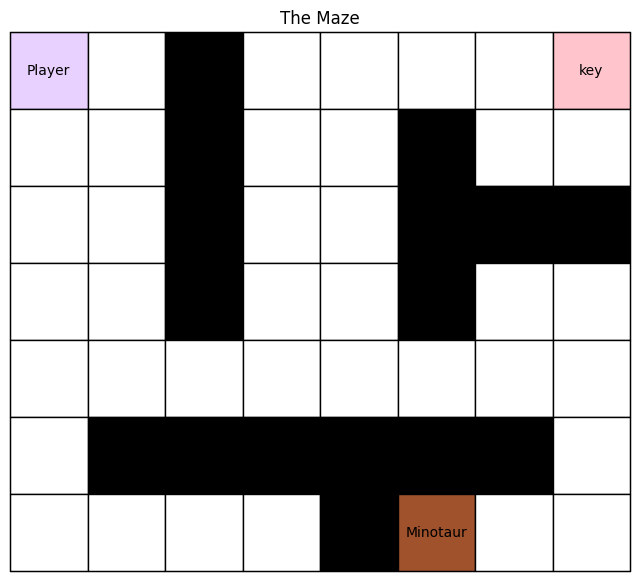

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import problem1_bonus as mz_b
maze_mat = np.array([
                [0, 0, 1, 0, 0, 0, 0, 0],
                [0, 0, 1, 0, 0, 1, 0, 0],
                [0, 0, 1, 0, 0, 1, 1, 1],
                [0, 0, 1, 0, 0, 1, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0],
                [0, 1, 1, 1, 1, 1, 1, 0],
                [0, 0, 0, 0, 1, 2, 0, 0]])
start_pos = (0,0)
minotaur_pos = (6,5)
key_pos = (0,7)
mz_b.draw_maze(maze_mat, start_pos, minotaur_pos,key_pos)

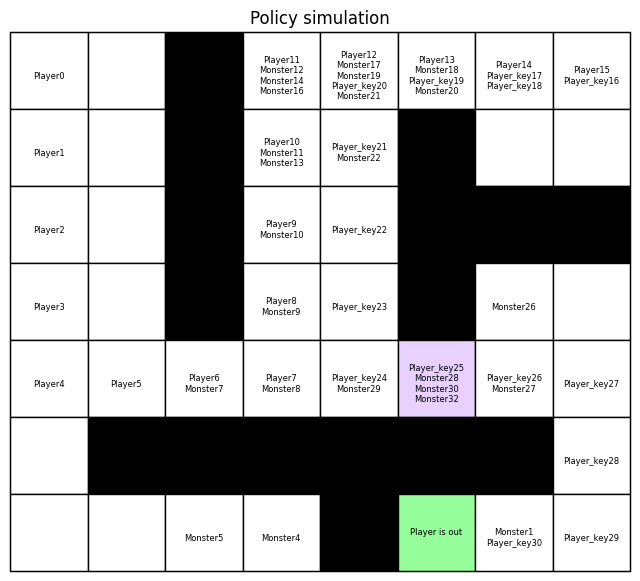

In [2]:
# Q-learning
env = mz_b.Maze_bonus(maze_mat,None,False,False,True)
n_states  = env.n_states
n_actions = env.n_actions
# Finite horizon
no_episodes = 50000
t_horizon = 200
alpha = 2/3
gamma = 49/50
epsilon_list = [0.1,0.5]
start  = ((0, 0),(6, 5),0)
value_mat = [[],[]]
Q_init = np.zeros((n_states, n_actions))
# Solve the MDP problem with dynamic programming 
Q, policy, value_list_1 = mz_b.Q_learning(env,Q_init,start,no_episodes,t_horizon,alpha,gamma,epsilon_list[0])
value_mat[0] = value_list_1
Q, policy, value_list_2 = mz_b.Q_learning(env,Q_init,start,no_episodes,t_horizon,alpha,gamma,epsilon_list[1])
value_mat[1] = value_list_2
print("Simulation done")
method = 'ValIter'
path = env.simulate(start, policy, method)
# Show the shortest path 
print(path)
mz_b.animate_solution(maze_mat, path)

In [ ]:
# SARSA
env = mz_b.Maze_bonus(maze_mat,None,False,False,False)
n_states  = env.n_states
n_actions = env.n_actions
# Finite horizon
no_episodes = 50000
t_horizon = 300
alpha = 2/3
gamma = 49/50
epsilon_list = [0.1,0.5]
start  = ((0, 0),(6, 5),0)
value_mat = [[],[]]
Q_init = np.zeros((n_states, n_actions))
# Solve the MDP problem with dynamic programming 
Q, policy, value_list_1 = mz_b.SARSA(env,Q_init,start,no_episodes,t_horizon,alpha,gamma,epsilon_list[0])
value_mat[0] = value_list_1
Q, policy, value_list_2 = mz_b.SARSA(env,Q_init,start,no_episodes,t_horizon,alpha,gamma,epsilon_list[1])
value_mat[1] = value_list_2
print("Simulation done")
method = 'ValIter'
path = env.simulate(start, policy, method)
# Show the shortest path 
print(path)
mz_b.animate_solution(maze_mat, path)

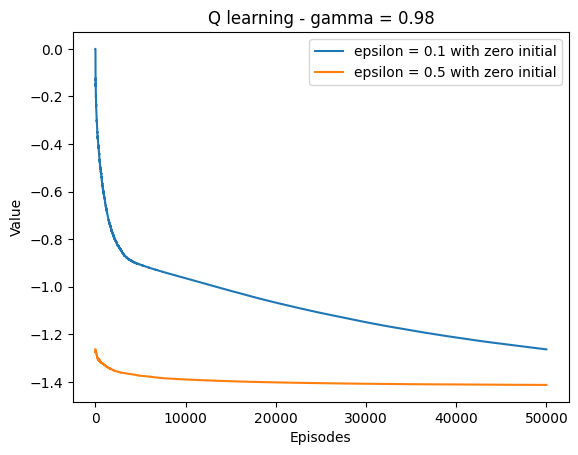

In [3]:
plt.plot(value_mat[0])
plt.plot(value_mat[1])
plt.ylabel('Value')
plt.xlabel('Episodes')
plt.title('Q learning - gamma = '+str(gamma))
plt.legend(['epsilon = 0.1 with zero initial', 'epsilon = 0.5 with zero initial',
            'epsilon = 0.1 with non-zero initial', 'epsilon = 0.5 with non-zero initial'])
plt.show()

In [4]:
Q_init = -np.random.uniform(1, 20, (n_states, n_actions))
for s in range(n_states):
    if env.states[s][0] == env.states[s][1] or (env.maze[env.states[s][0]]==2 and env.states[s][2] == 1):
        Q_init[s,:]=np.zeros(n_actions)
for epsilon in epsilon_list:
    value_list = []
    Q, policy, value_list = mz_b.Q_learning(env,Q_init,start,no_episodes,t_horizon,alpha,gamma,epsilon)
    value_mat.append(value_list)
    print("Simulation done")

Training: 100%|██████████| 50000/50000 [00:31<00:00, 1570.03episode/s]


Simulation done


Training: 100%|██████████| 50000/50000 [00:44<00:00, 1134.47episode/s]

Simulation done


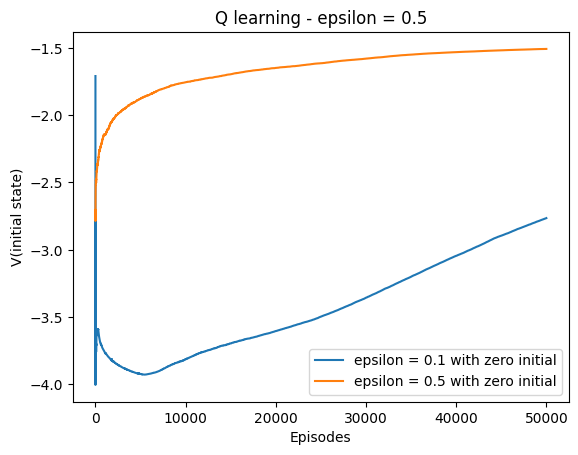

In [5]:
plt.plot(value_mat[2])
plt.plot(value_mat[3])
plt.ylabel('V(initial state)')
plt.xlabel('Episodes')
plt.title('Q learning - epsilon = '+str(epsilon))
plt.legend(['epsilon = 0.1 with zero initial', 'epsilon = 0.5 with zero initial',
            'epsilon = 0.1 with non-zero initial', 'epsilon = 0.5 with non-zero initial'])
plt.show()

In [6]:
value_mat[1][-1]

-1.4126736399539106